# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [158]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from Tools.tools import rec
from Tools.tools import collection

### Collection 

In [160]:
# collection()

#### 1. Importer votre DataSet

In [284]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

##### Print

In [285]:
mydata.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,8.769831,-28.132754,-7.217933,-2.926102,2.479673,-9.801402,-0.709304,-2.712402,-3.349622,-0.302495,-1.934686,-0.776286,0.0
1,9.101204,-27.712503,-7.402189,-7.684519,-3.144193,-11.474646,0.909369,3.870697,6.033722,4.852083,0.816946,-0.086821,1.0
2,8.269127,-28.096719,-4.344011,-5.690030,-0.695199,-6.964167,1.608848,-0.066286,1.533915,0.957556,-3.404431,-2.244226,2.0
3,8.952217,-25.828383,-3.867474,-2.178898,-0.195159,-13.190862,-4.091815,-2.099132,0.560830,3.301503,1.377358,-0.666695,3.0
4,9.360507,-25.953896,-9.181735,-5.169506,-0.276754,-12.081353,1.247758,1.873248,1.063382,3.797565,1.554781,-1.630786,4.0


---

## Entrainement sur données 0-1

In [327]:
test = mydata[mydata["Target"].isin([0, 1])]

In [328]:
test

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,8.769831,-28.132754,-7.217933,-2.926102,2.479673,-9.801402,-0.709304,-2.712402,-3.349622,-0.302495,-1.934686,-0.776286,0.0
1,9.101204,-27.712503,-7.402189,-7.684519,-3.144193,-11.474646,0.909369,3.870697,6.033722,4.852083,0.816946,-0.086821,1.0
10,10.833239,-17.390357,-2.065542,0.550677,4.810516,-8.736143,2.018994,0.479991,-2.742527,1.012074,-0.928832,-2.491313,0.0
11,11.771364,-12.149150,1.100455,1.781644,4.297379,-8.309138,2.232884,1.390569,0.202111,2.113167,-5.473123,-6.757033,1.0
20,8.884646,-26.445804,-3.222528,-5.604192,0.885089,-8.072114,0.146351,-1.376469,-3.790563,-2.206418,-0.589098,0.842442,0.0
21,8.502242,-28.192103,-5.292759,-6.370652,-1.858757,-11.192206,-2.095999,2.699804,4.244799,2.871033,0.679295,-1.696815,1.0
30,11.671615,-19.735454,-8.944508,-3.234550,4.477534,-10.420368,2.249685,-0.954852,-7.105804,-0.374305,1.591795,1.321635,0.0
31,7.971023,-29.764603,-5.359292,-8.003877,-3.158634,-10.209239,-0.141178,3.790219,4.161264,1.626042,-0.060559,-0.043726,1.0
40,9.238262,-25.044033,-5.311138,-2.640774,3.926478,-10.015266,-1.230152,-0.582003,-2.104836,-0.466653,0.369919,-0.502870,0.0
41,8.470965,-27.870810,-7.484424,-9.083141,-2.231193,-10.553339,-0.401730,1.937922,2.490221,0.377865,-1.246164,-0.919561,1.0


In [330]:
X = mydata.iloc[:,:-1]
y = mydata['Target']

X.shape

(153, 12)

In [331]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [332]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X_train))

StandardScaler()


In [333]:
scaler.transform(X_train)

array([[ 0.51908211,  0.33868447, -1.04606842, ..., -1.04467823,
        -0.6624518 , -0.82022475],
       [ 0.46124122,  0.96798582,  0.79953605, ...,  0.32080919,
        -0.50218317, -0.42558936],
       [-1.12928877, -0.69010077,  0.17583403, ...,  0.54969259,
         0.67936209,  0.45886623],
       ...,
       [ 0.17795399,  0.66695269,  1.30389036, ..., -1.50587282,
        -1.734212  , -1.76071346],
       [ 1.3461178 ,  0.77777542, -0.59694231, ..., -0.94576286,
        -0.84154908, -1.32697159],
       [ 2.25725224,  3.50123775,  2.95149445, ..., -0.14453686,
        -1.88426623, -0.30811767]])

In [334]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [335]:
from xgboost import XGBClassifier

boost = XGBClassifier()
boost.fit(X_train, y_train)

print("\n Accuracy", model.score(X_test,y_test))

[15:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Accuracy 0.9032258064516129


In [337]:
parameters = { }


pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier())])

pipeline_svm = Pipeline([('scalar3', StandardScaler()),
                      ('clf', svm.SVC())])

pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('knn_classifier',KNeighborsClassifier())])

pipeline_randomforest = Pipeline([('scalar5',StandardScaler()),
                     ('randomforest_classifier',RandomForestClassifier())])


pipeline_xgb = Pipeline([('scalar6',StandardScaler()),
                     ('xgb_classifier', XGBClassifier())])

pipelines = [pipeline_dt, pipeline_svm, pipeline_knn, pipeline_randomforest, pipeline_xgb]     
pipe_dict = {0: 'Arbre de décision,', 1: 'Support Vector Machine,', 2:'K Nearest Neighbor,', 3:'Random forest,', 4:'XGBoost'}
for x in pipelines:
  x.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))

[15:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Arbre de décision, Test Accuracy:0.3548387096774194
Support Vector Machine, Test Accuracy:0.5161290322580645
K Nearest Neighbor, Test Accuracy:0.4838709677419355
Random forest, Test Accuracy:0.5161290322580645
XGBoost Test Accuracy:0.41935483870967744


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [312]:
mydata.isnull().value_counts()

Fe1    Fe2    Fe3    Fe4    Fe5    Fe6    Fe7    Fe8    Fe9    Fe10   Fe11   Fe12   Target
False  False  False  False  False  False  False  False  False  False  False  False  False     153
dtype: int64

In [313]:
mydata.isna().sum()

Fe1       0
Fe2       0
Fe3       0
Fe4       0
Fe5       0
Fe6       0
Fe7       0
Fe8       0
Fe9       0
Fe10      0
Fe11      0
Fe12      0
Target    0
dtype: int64

<AxesSubplot:>

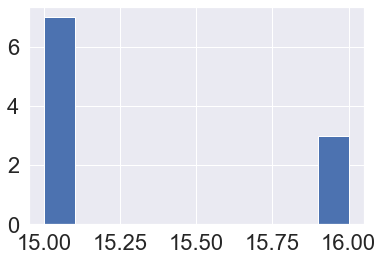

In [314]:
mydata['Target'].value_counts().hist()

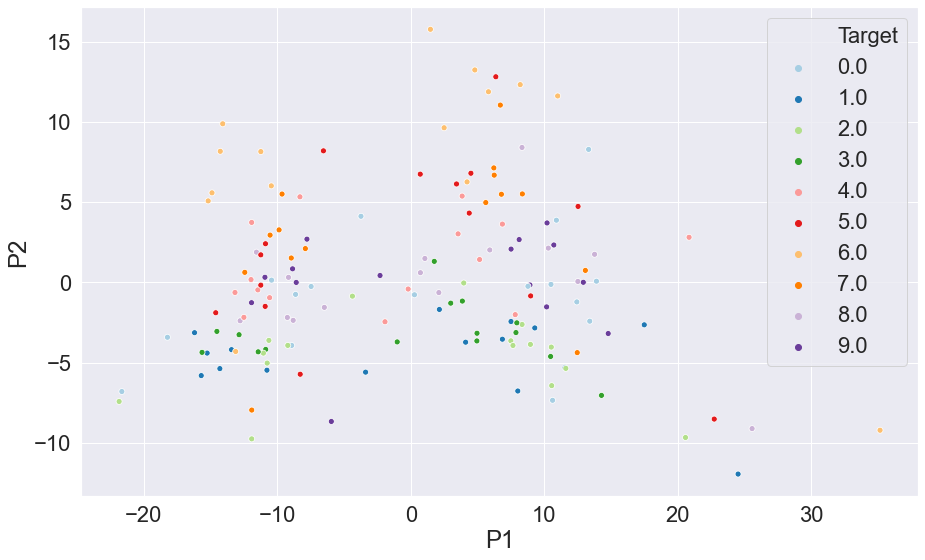

In [315]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df2 = pd.DataFrame(pca.fit_transform(mydata.iloc[:, :-1]))

df2["Target"] = mydata["Target"]
df2.columns = ["P1","P2","Target"]


plt.figure(1,figsize=(15,9))
plt.clf()
sns.scatterplot(x="P1",y="P2",hue="Target",data=df2, palette = "Paired")



#plt.plot(x,y,"+")

plt.xlabel('P1')
plt.ylabel('P2')
plt.show()

In [166]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     153 non-null    float64
 1   Fe2     153 non-null    float64
 2   Fe3     153 non-null    float64
 3   Fe4     153 non-null    float64
 4   Fe5     153 non-null    float64
 5   Fe6     153 non-null    float64
 6   Fe7     153 non-null    float64
 7   Fe8     153 non-null    float64
 8   Fe9     153 non-null    float64
 9   Fe10    153 non-null    float64
 10  Fe11    153 non-null    float64
 11  Fe12    153 non-null    float64
 12  Target  153 non-null    float64
dtypes: float64(13)
memory usage: 15.7 KB


#### 3. Visualiser les targets

In [316]:
mydata['Target']

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
      ... 
148    8.0
149    9.0
150    0.0
151    1.0
152    2.0
Name: Target, Length: 153, dtype: float64

#### 4. Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [317]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(153, 12)

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [318]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 6. Appliquer une normalisation centrée-réduite aux données en utilisant "StandardScaler"

In [319]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X_train))


StandardScaler()


In [320]:
scaler.transform(X_train)

array([[-0.46672235, -0.06837855,  0.69249987, ...,  0.24149276,
         0.49228008,  0.27553478],
       [-0.80421936, -0.37069088, -0.02141307, ..., -0.49292617,
        -0.68333872, -0.88705679],
       [-0.95740638, -0.81444935, -0.20252467, ...,  1.793673  ,
         2.27222239,  1.04338773],
       ...,
       [ 1.32480039,  0.66114477, -0.68927539, ..., -0.94012109,
        -0.77496414, -1.3192287 ],
       [ 1.7052987 ,  1.76445447,  0.66720037, ..., -0.46358522,
        -2.84779309, -1.05799226],
       [ 0.75543601,  0.33627223, -0.57429892, ..., -1.30957641,
         0.15972521, -0.66419989]])

#### 7. Développer votre meilleur modèle de classification

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [322]:
from xgboost import XGBClassifier

boost = XGBClassifier()
boost.fit(X_train, y_train)

print("\n Accuracy", model.score(X_test,y_test))

[14:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Accuracy 0.9032258064516129


In [323]:
parameters = { }


pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier())])

pipeline_svm = Pipeline([('scalar3', StandardScaler()),
                      ('clf', svm.SVC())])

pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('knn_classifier',KNeighborsClassifier())])

pipeline_randomforest = Pipeline([('scalar5',StandardScaler()),
                     ('randomforest_classifier',RandomForestClassifier())])


pipeline_xgb = Pipeline([('scalar6',StandardScaler()),
                     ('xgb_classifier', XGBClassifier())])

pipelines = [pipeline_dt, pipeline_svm, pipeline_knn, pipeline_randomforest, pipeline_xgb]     
pipe_dict = {0: 'Arbre de décision,', 1: 'Support Vector Machine,', 2:'K Nearest Neighbor,', 3:'Random forest,', 4:'XGBoost'}
for x in pipelines:
  x.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))

[14:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Arbre de décision, Test Accuracy:0.3548387096774194
Support Vector Machine, Test Accuracy:0.6451612903225806
K Nearest Neighbor, Test Accuracy:0.6451612903225806
Random forest, Test Accuracy:0.5806451612903226
XGBoost Test Accuracy:0.41935483870967744


In [324]:
param_range = [1, 2, 3, 4, 5, 6]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]



pipeline_lr=Pipeline([('scalar1',StandardScaler()),

                     ('lr_classifier',LogisticRegression())])

pipeline_dt=Pipeline([('scalar2',StandardScaler()),

                     ('dt_classifier',DecisionTreeClassifier())])

pipeline_svm = Pipeline([('scalar3', StandardScaler()),

                      ('clf', svm.SVC())])

pipeline_knn=Pipeline([('scalar4',StandardScaler()),

                     ('knn_classifier',KNeighborsClassifier())])

pipeline_randomforest = Pipeline([('pca4', PCA(n_components=2)),
                     ('randomforest_classifier',RandomForestClassifier())])

pipeline_xgboost = Pipeline([('scalar5', StandardScaler()),
                     ('xgboost',XGBClassifier())])

xgb_param_grid = [{'XGBlearning_rate': learning_rates,
                    'XGBmax_depth': param_range,
                    'XGBmin_child_weight': param_range[:2],
                    'XGBsubsample': param_range_fl,
                    'XGB__n_estimators': n_estimators}]

pipelines = [pipeline_lr, pipeline_dt, pipeline_svm, pipeline_knn, pipeline_randomforest, pipeline_xgboost]     
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector Machine', 3:'K Nearest Neighbor', 4: 'Randomforest', 5: 'Xgboost'}

for pipe in pipelines:
  pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))


[14:44:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Logistic Regression Test Accuracy:0.6129032258064516
Decision Tree Test Accuracy:0.25806451612903225
Support Vector Machine Test Accuracy:0.6451612903225806
K Nearest Neighbor Test Accuracy:0.6451612903225806
Randomforest Test Accuracy:0.22580645161290322
Xgboost Test Accuracy:0.41935483870967744


# Application en Temps Réel

In [326]:
from Tools.tools import rec
from Tools.tools import collection
import sounddevice as sd 
import time 
import scipy.io.wavfile as wav
from python_speech_features import mfcc 
import wave
import os
import numpy as np
import pandas as pd

for i in range(0,6):
    time.sleep(1)
    print(5-i)


rate = 48000
duration = 2

print("Prononcer votre Digit : ")
data = sd.rec(int(duration * rate), samplerate=rate, channels=1)
sd.wait()

data = data / data.max() * np.iinfo(np.int16).max
data = data.astype(np.int16)

mfcc_feat = np.mean(mfcc(data,rate, numcep=12), axis=0)
mfcc_feat = np.expand_dims(mfcc_feat, axis=0)
pred = pipeline_lr.predict(mfcc_feat)
print('------------------')
print('Digit : ', pred[0])
print('------------------')

5
4
3
2
1
0
Prononcer votre Digit : 
------------------
Digit :  0.0
------------------


---

## Partie 3 : Mettre en place la solution dans une application Test Temps Réel

In [325]:
import joblib

filename = 'modele.sav'

joblib.dump(pipeline_knn, filename)

nom_du_modele = joblib.load(filename)